In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [6]:
# Step 2: Load the Dataset
df = pd.read_csv(r"C:\Users\91808\Downloads\heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [7]:
# Step 3: Handle Missing Values
imputer = SimpleImputer(strategy='median')
df['oldpeak'] = imputer.fit_transform(df[['oldpeak']])

In [12]:
# Step 4: Encode Categorical Columns
df_encoded = df.copy()
categorical_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype(str)
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    


In [9]:
# Step 5: Prepare Features and Target
X = df_encoded.drop('num', axis=1)
y = (df_encoded['num'] > 0).astype(int)  # Convert to binary classification

In [10]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 7: Train Initial Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Initial Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Initial Accuracy: 0.7362637362637363
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74        89
           1       0.76      0.70      0.73        93

    accuracy                           0.74       182
   macro avg       0.74      0.74      0.74       182
weighted avg       0.74      0.74      0.74       182

Confusion Matrix:
 [[69 20]
 [28 65]]


In [13]:
# Step 8: Hyperparameter Tuning
param_grid = { 'max_depth': [3, 5, 10, 15, None], 'min_samples_split': [2, 5, 10],'criterion': ['gini', 'entropy']}


In [14]:
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [15]:
# Step 9: Evaluate Tuned Model
y_best_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Tuned Accuracy:", accuracy_score(y_test, y_best_pred))
print("Tuned Classification Report:\n", classification_report(y_test, y_best_pred))
print("Tuned Confusion Matrix:\n", confusion_matrix(y_test, y_best_pred))

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Tuned Accuracy: 0.7802197802197802
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77        89
           1       0.77      0.81      0.79        93

    accuracy                           0.78       182
   macro avg       0.78      0.78      0.78       182
weighted avg       0.78      0.78      0.78       182

Tuned Confusion Matrix:
 [[67 22]
 [18 75]]


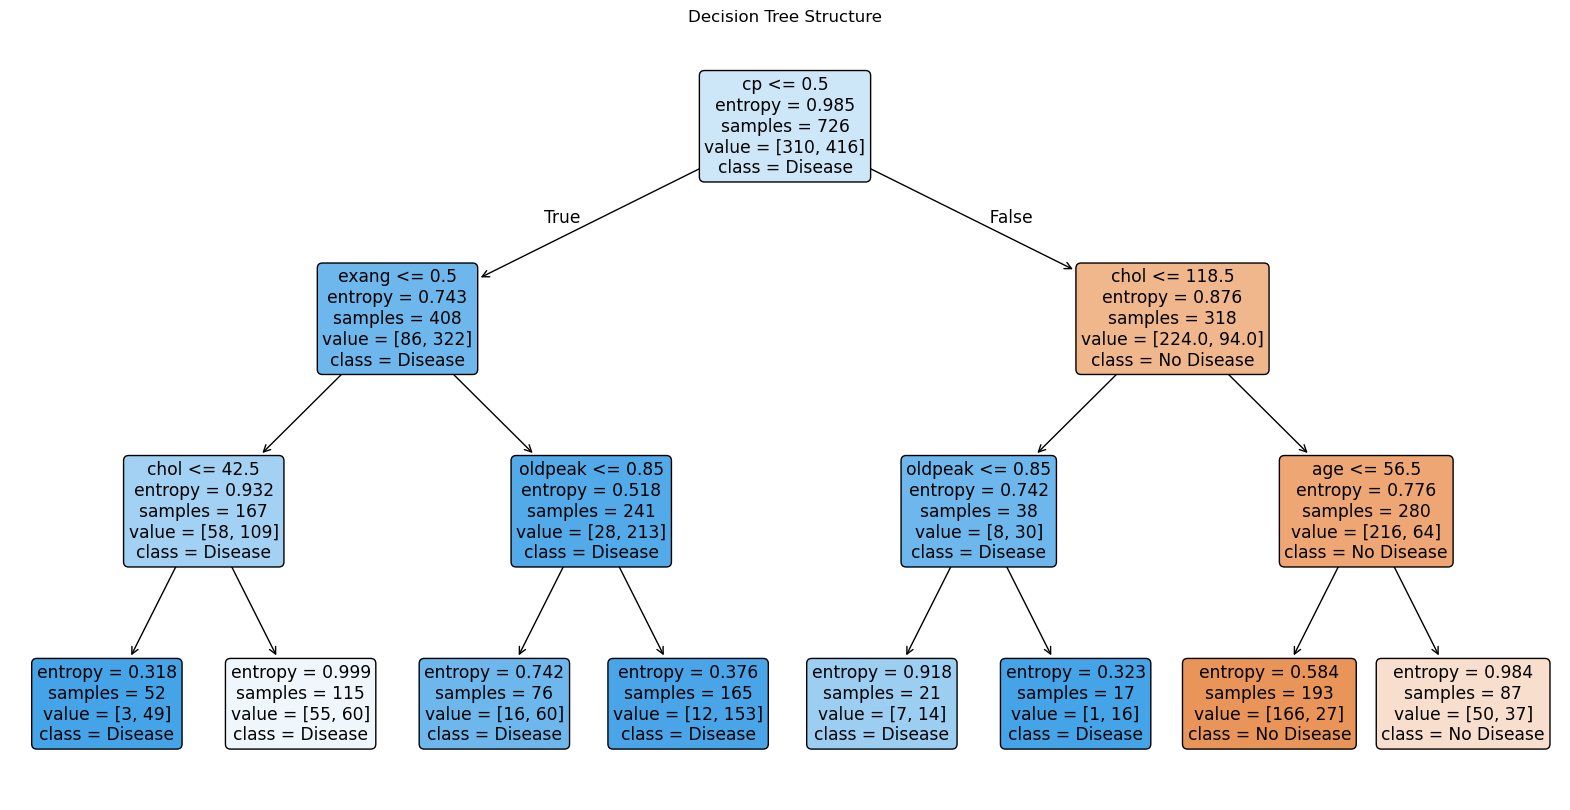

In [16]:
# Step 10: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Structure")
plt.show()

In [ ]:
# Interview Questions:
# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
# In a Decision Tree model, hyperparameters control the complexity, accuracy, and generalization of the model. Common hyperparameters include.
# Hyperparameter	Description	Effect on Model
# max_depth	(Maximum depth of the tree)	Limits overfitting by stopping the tree from growing too deep
# min_samples_split	(Minimum samples required to split an internal node) Higher value  simpler model, prevents overfitting
# min_samples_leaf	(Minimum samples required at a leaf node)	Forces leaves to have a minimum size, improves generalization

# 2. What is the difference between the Label encoding and One-hot encoding?

# Label Encoding
# Converts each category into an integer value.Preserves ordinal relationships (even if not meaningful)	
# Can confuse models that assume numerical relationship (e.g., Linear Regression, SVM)

# One-Hot Encoding
# Creates a binary column for each category (e.g., [1, 0, 0] for Red)
# Removes any implied order between categories. Safely used for most machine learning models
